IMDB (Internet Movie Database) is the world's largest source for everything related to movies, tv shows and so on. In this notebook, I'll try to analyze some data from IMDB to answer some interesting questions using Python. 
Questions like---
    1. What kind of data does the IMDB online databse cover and host?
    2. What kind of ratigs do people give in general? What movies get the best ratings and whether it's a normal distribution?
    3. Based on my favpourite movies, which ones should I also check next time? 
    

The dataset was downloaded from https://datasets.imdbws.com. In my analysis, I'll focus on mainly 2 datasets (title.basics and title.ratings) which offers 9 and 3 features respectively that include the title ID, name, type, adult movie flag, genre, ratings and the number of votes a title has received.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read IMDb Basics & Ratings datasets
# The basics includes 9 features for 9 million titles (as of January 02, 2022)

# tconst (string) - alphanumeric unique identifier of the title
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
# originalTitle (string) - original title, in the original language
# isAdult (boolean) - 0: non-adult title; 1: adult title
# startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
# endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
# runtimeMinutes – primary runtime of the title, in minutes
# genres (string array) – includes up to three genres associated with the title

basics_tsv_file ="/content/drive/MyDrive/DataAnalysis/title.basics.tsv"
basics = pd.read_csv(basics_tsv_file, sep='\t',low_memory=False)
basics.shape

(9490674, 9)

In [5]:
# There are 1.2 million movies in the ratings datasets (as of January 02, 2022)
# The ratings includes 3 features for 1 million titles

#title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
#tconst (string) - alphanumeric unique identifier of the title
#averageRating – weighted average of all the individual user ratings
#numVotes - number of votes the title has received
ratings_tsv_file = "/content/drive/MyDrive/DataAnalysis/title.ratings.tsv"
ratings = pd.read_csv(ratings_tsv_file, sep='\t')

ratings.shape

(1261705, 3)

In [6]:
# Merge IMDb Basics & Ratings datasets by tconst
# The new dataset has alomost 1.2 million movies
data = pd.merge(basics, ratings, on ="tconst")
data.shape

(1261705, 11)

As I merge the two datasets, we see that the number of titles did not decreased after merge. This implied that all the titles included in title.ratings are actually a subset of the titles in title.basics; this is good news as it means that all titles with ratings have basic information in place.
With that, the merged dataset as shown below has almost 1.2 million titles and 11 dimensions, where various analysis tools can be applied on.

In [7]:
data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1930
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,261
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1750
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,176
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2563
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.1,176
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.4,803
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,2078
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,201
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.9,7009


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261705 entries, 0 to 1261704
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1261705 non-null  object 
 1   titleType       1261705 non-null  object 
 2   primaryTitle    1261705 non-null  object 
 3   originalTitle   1261705 non-null  object 
 4   isAdult         1261705 non-null  object 
 5   startYear       1261705 non-null  object 
 6   endYear         1261705 non-null  object 
 7   runtimeMinutes  1261705 non-null  object 
 8   genres          1261703 non-null  object 
 9   averageRating   1261705 non-null  float64
 10  numVotes        1261705 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 115.5+ MB


In [9]:
data.describe(include= "all")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
count,1261705,1261705,1261705,1261705,1261705,1261705,1261705,1261705,1261703,1.261705e+06,1.261705e+06
unique,1261705,10,947831,962397,4,145,82,715,2030,NaN,NaN
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,2019,\N,\N,Comedy,NaN,NaN
freq,1,610365,4901,4901,1241991,56787,1218960,351831,105355,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.952864e+00,1.042686e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386562e+00,1.732245e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,5.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000e+00,1.200000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.100000e+00,2.600000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.900000e+00,1.020000e+02


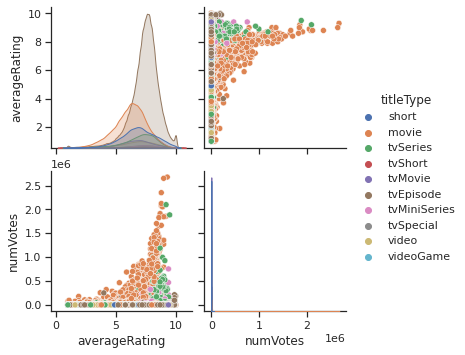

In [10]:
# Pair plots - scatterplots for joint relationships and histograms for univariate distributions
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue= 'titleType')

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb Title Types')

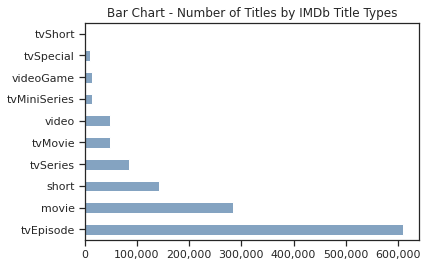

In [11]:
# Distribution of the 10 Title Types (bar chart)
import matplotlib.pyplot as plt
ax = data['titleType'].value_counts().plot(kind='barh', color=(0.2, 0.4, 0.6, 0.6))
import matplotlib.ticker as mtick
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks()

plt.title('Bar Chart - Number of Titles by IMDb Title Types')

Types & Genres of Titles---
For the Tiles Types, Pareto 80/20 rule is definitely true here. There are in total 10 different Title Types, where the top ones with the highest number of titles are TV Episodes (accounting for almost half of the titles), followed by Movies and Short Films. These top three types in total account for over 80% of the total number of titles. On the other hand,the bottom 3 types with the least number of titles (TV short, TV special and TV mini series) in total account for less than 10% of the total number of titles.

Text(0.5, 1.0, 'Pie Chart - Number of Titles by IMDb Title Types')

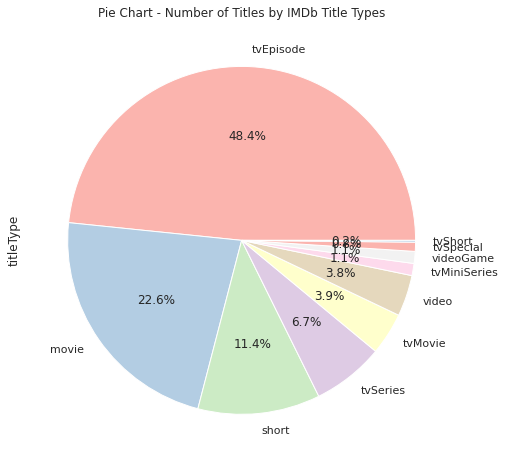

In [12]:
# Distribution of the 10 Title Types (pie chart in colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['titleType'].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Pie Chart - Number of Titles by IMDb Title Types')

In [13]:
# Check genres 
data['genres'].value_counts().head()

Comedy                        105355
Drama                          94841
Documentary                    72242
Action,Adventure,Animation     39686
Reality-TV                     28653
Name: genres, dtype: int64

For the Tiles Genres, IMDb has a long list of almost 2,000 different genres. And as can be seen, the distribution of genres has a long tail where only the top 3 Genres (Comedy, Drama and Documentary) take a share for more than 5% but all other genres account for nothing more than 3%.
Note that the long tail may be resulted from an overly complicated classification among different genres. For example, while “Comedy” accounts for 9%, there are lots of similar but slightly different genres such as “Comedy, Drama” (2%), “Comedy, short” (2%), or even “Adventure, Animation, Comedy” (1%) etc etc, each taking up some of the shares that could’ve been classified as “Comedy”. Not to mention how one movie can be strictly classified as “Adventure, Animation, Comedy” instead of simply “Action, Adventure, Animation” or “Comedy.”

Text(0.5, 1.0, 'Pie Chart - Number of Titles by IMDb genres')

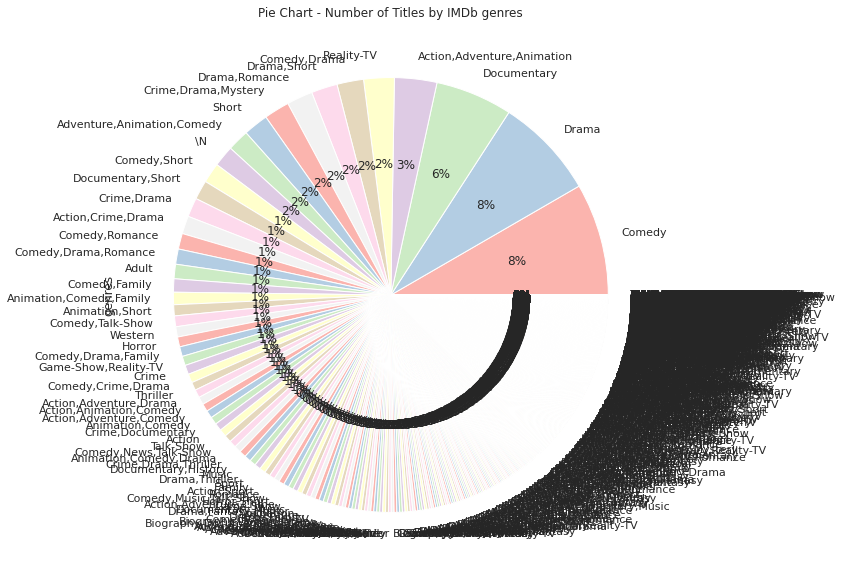

In [14]:
# Distribution of the 10 genres (pie chart in cute colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['genres'].value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(10, 10), colors=colors)
plt.title('Pie Chart - Number of Titles by IMDb genres')

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb genres')

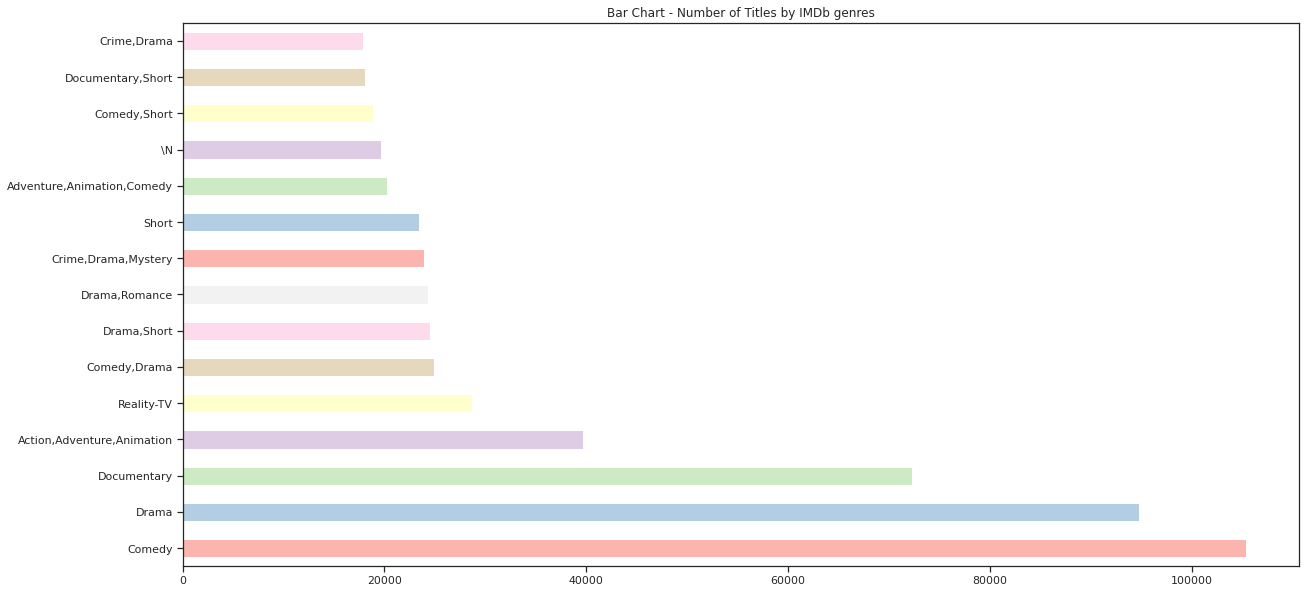

In [15]:
# Distribution of the 10 Title Types (bar chart)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

import matplotlib.pyplot as plt
ax = data['genres'].value_counts().head(15).plot(kind='barh', figsize=(20,10), color=colors)
# color=(0.2, 0.4, 0.6, 0.6),
plt.title('Bar Chart - Number of Titles by IMDb genres')

In [16]:
# Lesson learned 1: can't use astype where NaN's are applicable
# Instead, use pd.to_numeric & pd.to_datetime
# Lesson learned 2: had i transformed the types without looking into the details, i would've transfered
# the incorrect 2014 and 2019 into isAdult 1
# Just keep the isAdult as is...
data['isAdult']=data['isAdult'].astype('bool')
data['runtimeMinutes']= pd.to_numeric(data['runtimeMinutes'], errors='coerce')
data['startYear']= pd.to_datetime(data['startYear'], errors='coerce')
data['endYear']= pd.to_datetime(data['endYear'], errors='coerce')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261705 entries, 0 to 1261704
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   tconst          1261705 non-null  object        
 1   titleType       1261705 non-null  object        
 2   primaryTitle    1261705 non-null  object        
 3   originalTitle   1261705 non-null  object        
 4   isAdult         1261705 non-null  bool          
 5   startYear       1261463 non-null  datetime64[ns]
 6   endYear         42745 non-null    datetime64[ns]
 7   runtimeMinutes  909872 non-null   float64       
 8   genres          1261703 non-null  object        
 9   averageRating   1261705 non-null  float64       
 10  numVotes        1261705 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 139.3+ MB


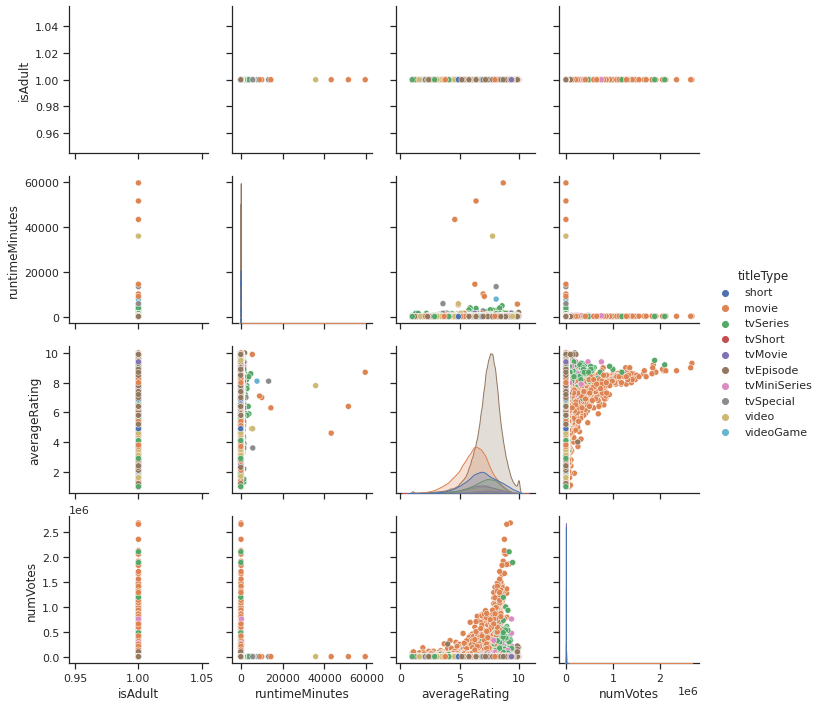

In [18]:
# Pair plots - scatterplots for joint relationships and histograms for univariate distributions
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue= 'titleType')

Adult or X-Rated Movies

IMDb has a “isAdult” factor which is a boolean (0/1) variable in the basic dataset that flags out 18+ Adult Movies. As from the above pie chart, there are minimal number of Adult Movies in the IMDb database, accounting for only 1.8% of the total number of titles.
(*Note to transform the dtype from object to boolean before doing the analysis as the default dtype can be misleading for further analysis)

Text(0.5, 1.0, 'Pie Chart - Adult Titles or Not')

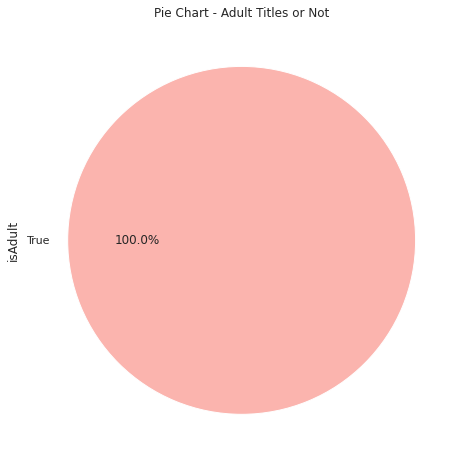

In [20]:
# Distribution of Adult movies (pie chart)
# 98.2% of the movies are not Adult ones
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['isAdult'].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Pie Chart - Adult Titles or Not')

Ratings

Average  movie rating is around 7 out 10.
Here’s a box-and-whisker diagram that helps describe the differences in Ratings distribution among and within each Title Type. First, it is interesting to see that instead of a normal Gaussian distribution, overall the Ratings are very skewed to the right. Instead of having a medium rating of 5, the typical medium average rating is around 7.


Ratings for TV Episodes are much higher than Movies.
Also, among the ten Title Types, Ratings for TV Episodes are overall higher with less variation compared to Movies, which brings up an interesting question: is it really because the quality of TV Episodes is significantly better than Movies in general? Do people tend to hold a higher standard and be more critical on Movies? These are yet to be answered but for sure if you see a TV Episode with Ratings of 7, it is likely just an average series. On the other hand, make sure to check out a movie with Ratings of 7!

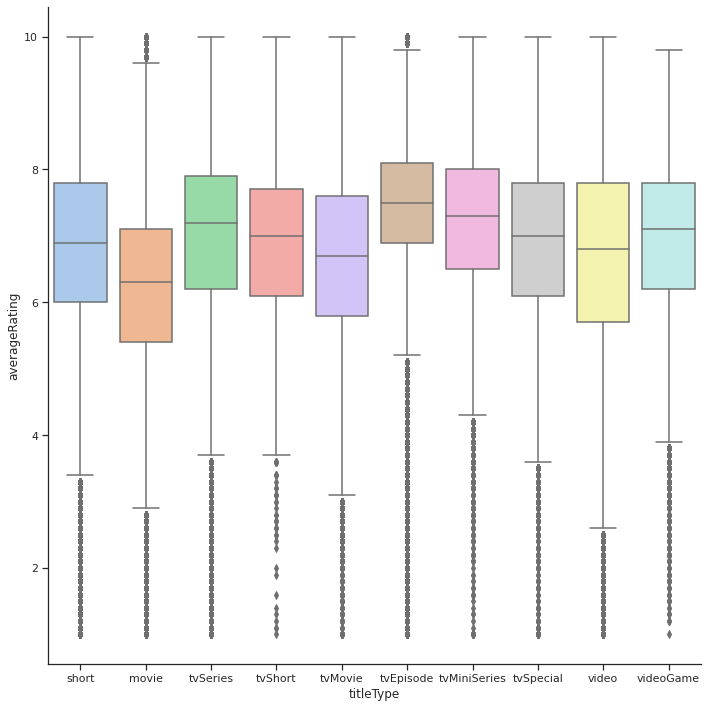

In [21]:
# Distribution of the averageRating
# Skewed to the left
sns.catplot(x="titleType", y="averageRating", hue="titleType", height =10, palette="pastel",
            kind="box", dodge=False, data=data);